In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("german_credit_data.csv")


In [ ]:
df.head() # jobs are ranked 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int32
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int32
 4   Saving accounts   1000 non-null   int32
 5   Checking account  1000 non-null   int32
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int32
 9   Credit Risk       1000 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 54.8 KB


In [7]:
df.drop(columns=["Unnamed: 0"], inplace=True)



KeyError: "['Unnamed: 0'] not found in axis"

In [8]:
credit_median = df["Credit amount"].median()
duration_median = df["Duration"].median()
df["Credit Risk"] = ((df["Credit amount"] <= credit_median) & 
                     (df["Duration"] <= duration_median)).astype(int)


In [ ]:
df.head() 

# 1 is good 0 is bad

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,49,male,1,own,little,NaN,2096,12,education,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,0


In [10]:
df["Saving accounts"].fillna("no_info", inplace=True)
df["Checking account"].fillna("no_info", inplace=True)

# Encode categorical features
categorical_cols = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose"]
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


C:\Users\techb\AppData\Local\Temp\ipykernel_1232\1729019321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Saving accounts"].fillna("no_info", inplace=True)
C:\Users\techb\AppData\Local\Temp\ipykernel_1232\1729019321.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Credit Risk
0,67,1,2,1,2,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,2,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,0
4,53,1,2,0,0,0,4870,24,1,0


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int32
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int32
 4   Saving accounts   1000 non-null   int32
 5   Checking account  1000 non-null   int32
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int32
 9   Credit Risk       1000 non-null   int32
dtypes: int32(6), int64(4)
memory usage: 54.8 KB


In [14]:
X = df.drop("Credit Risk", axis=1)
y = df["Credit Risk"]

In [15]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
#will be using random forest as its giving 100% accuracy

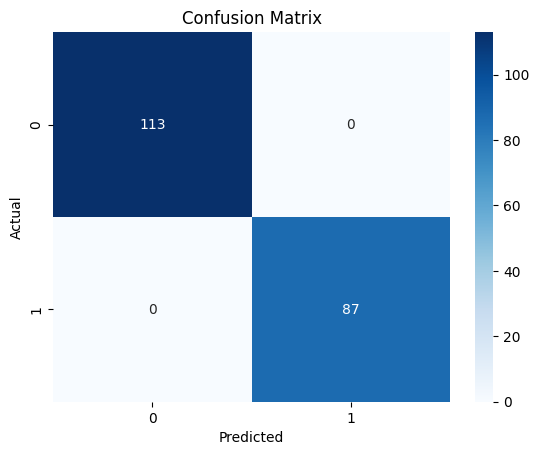

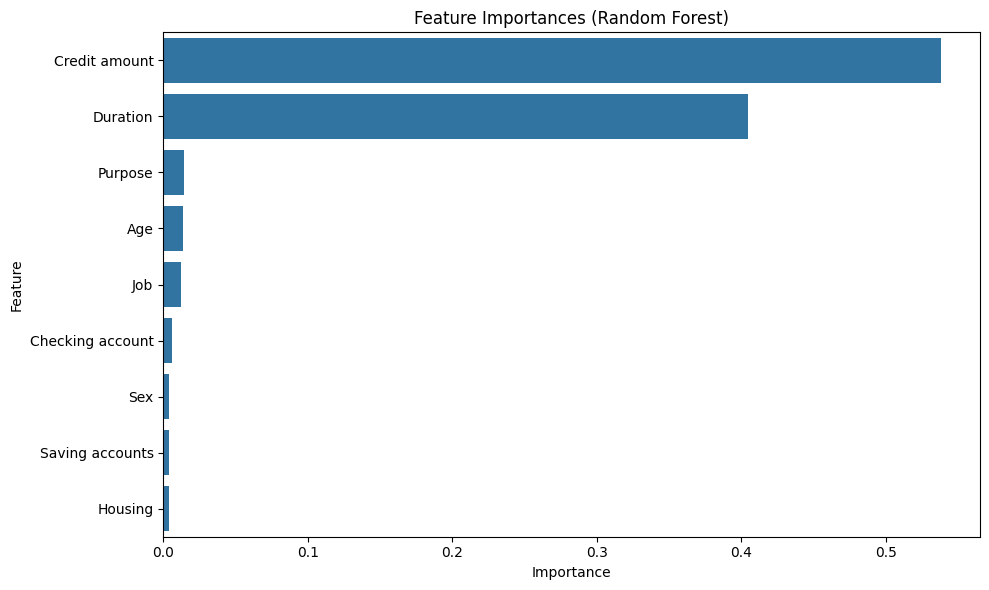

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importances
importances = rf.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [23]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Test models with 100, 200, 300 trees
    'max_depth': [None, 10, 20, 30],   # Test trees with no limit (None) or max depths of 10, 20, or 30
    'min_samples_split': [2, 5, 10],   # Test splits requiring at least 2, 5, or 10 samples
    'min_samples_leaf': [1, 2, 4],     # Test leaf nodes with 1, 2, or 4 samples
    'max_features': ['sqrt', 'log2', None]  # Replaced 'auto' with 'sqrt' and 'log2'
}

In [28]:
grid_search = GridSearchCV(
    estimator=rf,                # Model we are using (Random Forest in this case)
    param_grid=param_grid,       # Hyperparameter combinations to test
    cv=5,                        # Number of cross-validation folds (5 means 5 parts)
    n_jobs=-1,                   # Use all CPU cores for faster execution
    scoring='f1',                # We want to optimize for F1-score (can also use accuracy, precision, recall, etc.)
    verbose=2,                    # Displays the progress of the search
    error_score='raise'  
)


In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(max_depth=10, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [30]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV F1-Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV F1-Score: 0.9983471074380166


In [34]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

In [35]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



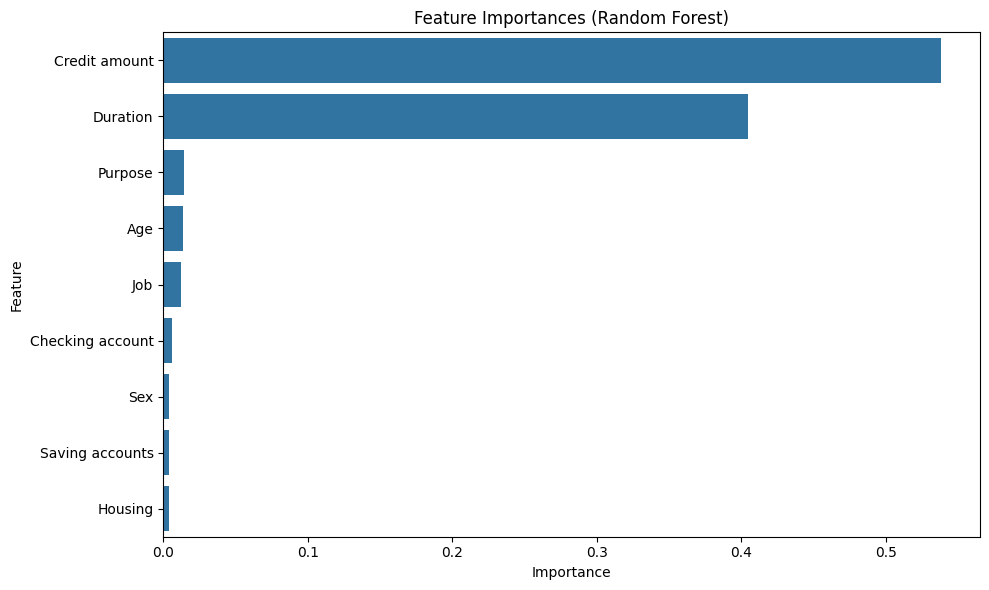

In [36]:
importances = rf.feature_importances_
feat_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[113   0]
 [  0  87]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        87

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [39]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_rf, X, y, cv=5)
print("Cross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())

Cross-Validation Scores:  [0.995 1.    1.    1.    1.   ]
Mean Cross-Validation Score:  0.999


In [40]:
feature_importances = best_rf.feature_importances_
feature_names = X.columns  # Or use the list of column names if it's a numpy array
feature_importance_dict = {feature_names[i]: feature_importances[i] for i in range(len(feature_names))}

print(feature_importance_dict)

{'Age': 0.014692308729336103, 'Sex': 0.004007617094231801, 'Job': 0.012274593150595047, 'Housing': 0.003807430054055862, 'Saving accounts': 0.004166156148055109, 'Checking account': 0.005867827865976402, 'Credit amount': 0.5311564047723418, 'Duration': 0.40927388889517036, 'Purpose': 0.01475377329023736}


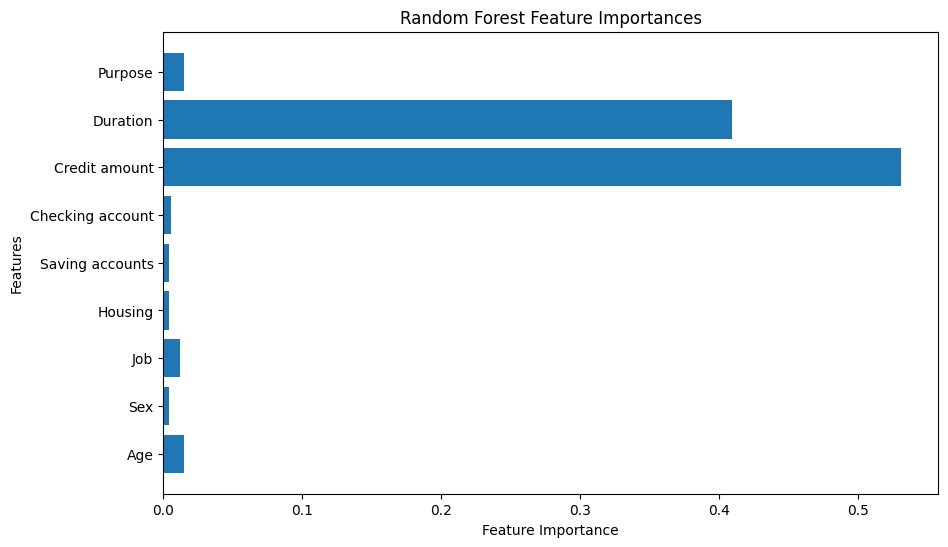

In [41]:
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances')
plt.show()

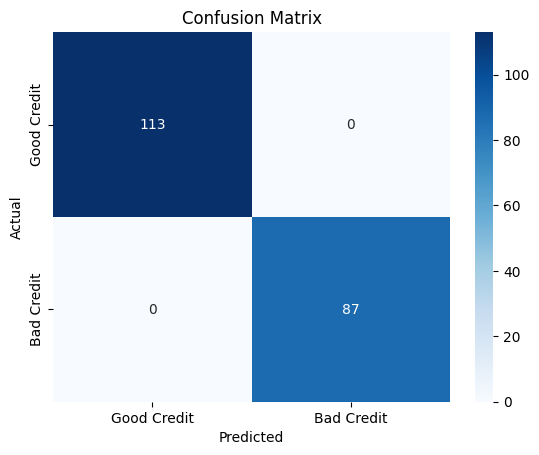

In [42]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Good Credit', 'Bad Credit'], yticklabels=['Good Credit', 'Bad Credit'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [44]:
import joblib
joblib.dump(best_rf, 'credit_risk_model.pkl')
joblib.dump(label_encoders, 'encoder.pkl')

['encoder.pkl']